### Global Data on Sustainable Energy (2000-2020)

#### Description

Uncover this comprehensive dataset showcasing sustainable energy indicators and other useful factors across all countries from 2000 to 2020. Dive into vital aspects such as electricity access, renewable energy, carbon emissions, energy intensity, Financial flows, and economic growth. Compare nations, track progress towards Sustainable Development Goal 7, and gain profound insights into global energy consumption patterns over time.

##### Potential Use cases

* Energy Consumption Prediction: Predict future energy usage, aid planning, and track SDG 7 progress.
* Carbon Emission Forecasting: Forecast CO2 emissions, support climate strategies.
* Energy Access Classification: Categorize regions for infrastructure development, understand sustainable energy's role.
* Sustainable Development Goal Tracking: Monitor progress towards Goal 7, evaluate policy impact.
* Energy Equity Analysis: Analyze access, density, and growth for equitable distribution.
* Energy Efficiency Optimization: Identify intensive areas for environmental impact reduction.
* Renewable Energy Potential Assessment: Identify regions for green investments based on capacity.
* Renewable Energy Investment Strategies: Guide investors towards sustainable opportunities.

In [1]:
#pip install cartopy
#https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

In [2]:
#pip install geopandas

In [3]:
#pip install folium

In [4]:
#pip install the chart-studio

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects
from cartopy import crs as ccrs
import geopandas as gpd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
import os

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from folium.plugins import MarkerCluster
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
df =pd.read_csv('C:/Users/julie/Documents/Kaggle_Datasets/sustainable-energy/global-data-on-sustainable-energy.csv')
df.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

In [7]:
df.describe()

Year  Access to electricity (% of population)  \
count  3649.000000                              3639.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.275541   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.800890   
50%    2010.000000                                98.361570   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        2718.000000      
mean                                          113.137498      
std                                           244.167256      
min                                             0.000000      
25%                                             3.540000      
50%                                            32.910000      
75%                                           112.210000      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    1.560000e+03   
mean                                     9.422400e+07   
std                                      2.981544e+08   
min                                      0.000000e+00   
25%                                      2.600000e+05   
50%                                      5.665000e+06   
75%                                      5.534750e+07   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3455.000000                  
mean                                           32.638165                  
std                                            29.894901                  
min                                             0.000000                  
25%                                             6.515000                  
50%                                            23.300000                  
75%                                            55.245000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3628.000000                     3523.000000   
mean                             70.365003                       13.450190   
std                             348.051866                       73.006623   
min                               0.000000                        0.000000   
25%                               0.290000                        0.000000   
50%                               2.970000                        0.000000   
75%                              26.837500                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3628.000000   
mean                           23.968010   
std                           104.431085   
min                             0.000000   
25%                             0.040000   
50%                             1.470000   
75%                             9.600000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3607.000000   
mean                                36.801182   
std                                 34.31488

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [9]:
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [10]:
df[~df['Access to electricity (% of population)'].isna()]

Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan  2003                                14.738506   
4     Afghanistan  2004                                20.064968   
...           ...   ...                                      ...   
3644     Zimbabwe  2016                                42.561730   
3645     Zimbabwe  2017                                44.178635   
3646     Zimbabwe  2018                                45.572647   
3647     Zimbabwe  2019                                46.781475   
3648     Zimbabwe  2020                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3                                   9.5   
4                                  10.9   
...                                 ...   
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
0                                                  9.22      
1                                                  8.86      
2                                                  8.47      
3                                                  8.09      
4                                                  7.75      
...                                                 ...      
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Financial flows to developing countries (US $)  \
0                                            20000.0   
1                                           130000.0   
2                                          3950000.0   
3                                         25970000.0   
4                                                NaN   
...                                              ...   
3644                                         30000.0   
3645                                       5570000.0   
3646                                         10000.0   
3647                                        250000.0   
3648                                         30000.0   

      Renewable energy share in the total final energy consumption (%)  \
0                                                 44.99                  
1                                                 45.60                  
2                                                 37.83                  
3                                                 36.66                  
4                                                 44.24                  
...                                                 ...                  
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                    0.16                             0.0   
1                                    0.09                             0.0   
2                                    0.13                             0.0   
3                                    0.31                     

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3644    False
3645    False
3646    False
3647    False
3648    False
Length: 3649, dtype: bool

In [12]:
# Replace on multiple columns
# df[["Access to electricity (% of population)","Access to clean fuels for cooking"]] = df[["Access to electricity (% of population)","Access to clean fuels for cooking"]].fillna(0)
# print(df)

# Repalce NaN with zero on all columns 
# df2 = df.fillna(0)
# print(df2)

# Repalce inplace 
df.fillna(0.0,inplace=True)
print(df)

           Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan  2003                                14.738506   
4     Afghanistan  2004                                20.064968   
...           ...   ...                                      ...   
3644     Zimbabwe  2016                                42.561730   
3645     Zimbabwe  2017                                44.178635   
3646     Zimbabwe  2018                                45.572647   
3647     Zimbabwe  2019                                46.781475   
3648     Zimbabwe  2020                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3          

In [13]:
df.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

### Dataset Column Names and Description

* <b>Entity</b>: The name of the country or region for which the data is reported.
* <b>Year</b>: The year for which the data is reported, ranging from 2000 to 2020.
* <b>Access to electricity (% of population)</b>: The percentage of population with access to electricity.
* <b>Access to clean fuels for cooking (% of population)</b>: The percentage of the population with primary reliance on clean fuels.
* <b>Renewable-electricity-generating-capacity-per-capita</b>: Installed Renewable energy capacity per person.
* <b>Financial flows to developing countries (US)</b>: Aid and assistance from developed countries for clean energy projects.
* <b>Renewable energy share in total final energy consumption(%)</b>: Percentage of renewable energy in final energy consumption.
* <b>Electricity from fossil fuels (TWh)</b>: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
* <b>Electricity from nuclear (TWh)</b>: Electricity generated from nuclear power in terawatt-hours.
* <b>Electricity from renewables (TWh)</b>: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
* <b>Low-carbon electricity (% electricity)</b>: Percentage of electricity from low-carbon sources (nuclear and renewables).
* <b>Primary energy consumption per capita (kWh/person)</b>: Energy consumption per person in kilowatt-hours.
* <b>Energy intensity level of primary energy (MJ/2011 PPP GDP)</b>: Energy use per unit of GDP at purchasing power parity.
* <b>Value_co2_emissions (metric tons per capita)</b>: Carbon dioxide emissions per person in metric tons.
* <b>Renewables (% equivalent primary energy)</b>: Equivalent primary energy that is derived from renewable sources.
* <b>GDP growth (annual %)</b>: Annual GDP growth rate based on constant local currency.
* <b>GDP per capita</b>: Gross domestic product per person.
* <b>Density (P/Km2)</b>: Population density in persons per square kilometer.
* <b>Land Area (Km2)</b>: Total land area in square kilometers.
* <b>Latitude</b>: Latitude of the country's centroid in decimal degrees.
* <b>Longitude</b>: Longitude of the country's centroid in decimal degrees.

In [14]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [15]:
#df.columns = df.columns.str.replace('Financial flows to developing countries (US $)', 'Financial flows to developing countries (USD)')
df.columns = df.columns.str.replace('Value_co2_emissions_kt_by_country', 'CO2 Emissions by Country')
df.columns = df.columns.str.replace('gdp_growth', 'GDP growth (annual %)')
df.columns = df.columns.str.replace('gdp_per_capita', 'GDP per capita')
df.columns = df.columns.str.replace('Density\n(P/Km2)', 'Density (P/Km2)')

    
df.head()

C:\Users\julie\AppData\Local\Temp\ipykernel_9848\2144527731.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('Density\n(P/Km2)', 'Density (P/Km2)')


Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             0.0   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   CO2 Emissions by Country  Renewables (% equivalent primary energy)  \
0                760.000000                                       0.0   
1                730.000000                                       0.0   
2               1029.999971                                       0.0   
3               1220.000029                                       0.0   
4               1029.999971                                       0.0   

   GDP growth (annual %)  GDP per capita  Density\n(P/Km2) Land Area(Km2)  \
0               0.000000        0.000000                60       652230.0   
1               0.000000        0.000000                60       652230.0   
2               0.000000      179.426579                60       652230.0   
3               8.832278      190.683814                60       652230.

In [16]:
df['Entity'].value_counts()

Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: Entity, Length: 176, dtype: int64

In [17]:
df['Year'].value_counts()

2020    175
2019    175
2018    175
2017    175
2016    175
2015    175
2014    175
2013    175
2011    174
2012    174
2010    174
2009    174
2008    174
2007    174
2000    173
2001    172
2006    172
2005    172
2004    172
2003    172
2002    172
Name: Year, dtype: int64

In [18]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

C:\Users\julie\AppData\Local\Temp\ipykernel_9848\397159180.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


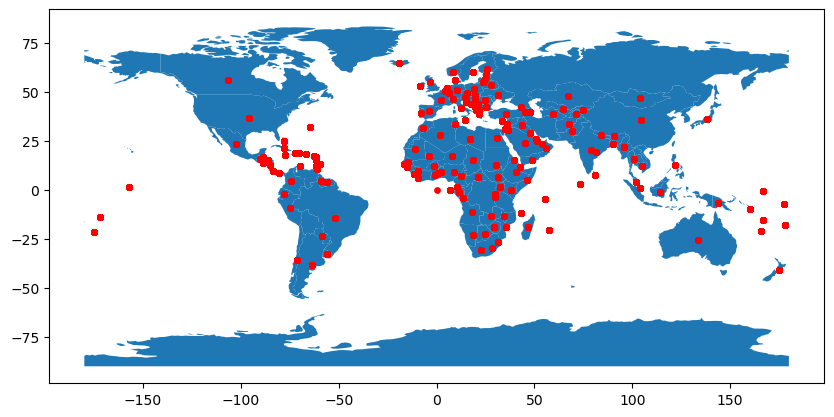

In [19]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

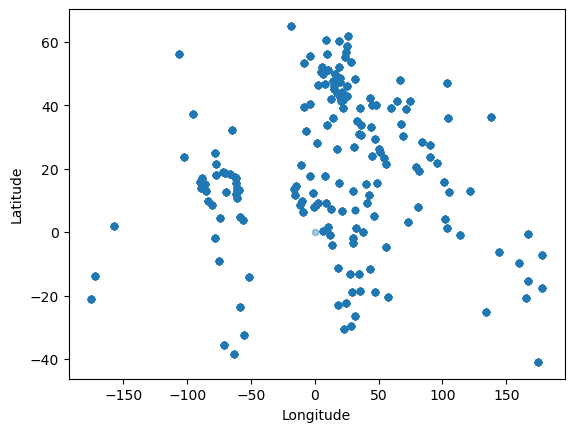

In [20]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

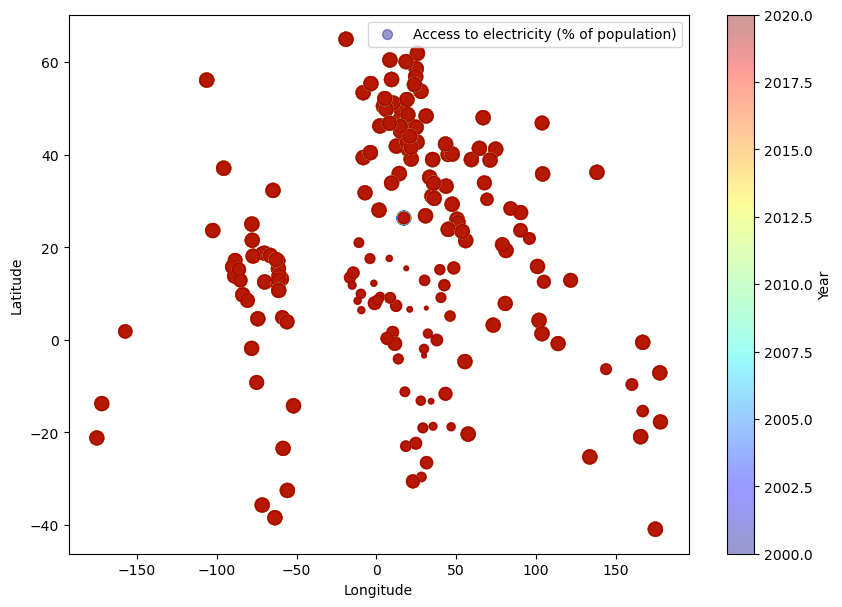

In [21]:
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df['Access to electricity (% of population)'], label="Access to electricity (% of population)",
    c="Year", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [22]:
#installation
#pip install folium
# Create a world map to show distributions of users 
#import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Entity : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['Entity'],
                                   df.iloc[i]['GDP per capita']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

In [23]:
df_financial_aid = df.Entity[df['Financial flows to developing countries (US $)'] > 0]
df_financial_aid

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
5       Afghanistan
           ...     
3644       Zimbabwe
3645       Zimbabwe
3646       Zimbabwe
3647       Zimbabwe
3648       Zimbabwe
Name: Entity, Length: 1535, dtype: object

In [24]:
corr = df.corr()
corr

Year  \
Year                                                1.000000   
Access to electricity (% of population)             0.132617   
Access to clean fuels for cooking                   0.068734   
Renewable-electricity-generating-capacity-per-c...  0.086321   
Financial flows to developing countries (US $)      0.109810   
Renewable energy share in the total final energ... -0.111277   
Electricity from fossil fuels (TWh)                 0.032524   
Electricity from nuclear (TWh)                     -0.004693   
Electricity from renewables (TWh)                   0.073719   
Low-carbon electricity (% electricity)              0.029834   
Primary energy consumption per capita (kWh/person)  0.004196   
Energy intensity level of primary energy (MJ/$2... -0.259373   
CO2 Emissions by Country                            0.005162   
Renewables (% equivalent primary energy)            0.054758   
GDP growth (annual %)                              -0.176752   
GDP per capita                                      0.129598   
Land Area(Km2)                                     -0.001447   
Latitude                                            0.003848   
Longitude                                           0.001046   

                                                    Access to electricity (% of population)  \
Year                                                                               0.132617   
Access to electricity (% of population)                                            1.000000   
Access to clean fuels for cooking                                                  0.765773   
Renewable-electricity-generating-capacity-per-c...                                 0.146139   
Financial flows to developing countries (US $)                                    -0.023797   
Renewable energy share in the total final energ...                                -0.764232   
Electricity from fossil fuels (TWh)                                                0.123449   
Electricity from nuclear (TWh)                                                     0.123718   
Electricity from renewables (TWh)                                                  0.137459   
Low-carbon electricity (% electricity)                                            -0.148487   
Primary energy consumption per capita (kWh/person)                                 0.455228   
Energy intensity level of primary energy (MJ/$2...                                -0.256758   
CO2 Emissions by Country                                                           0.116070   
Renewables (% equivalent primary energy)                                           0.276072   
GDP growth (annual %)                                                             -0.100637   
GDP per capita                                                                     0.396364   
Land Area(Km2)                                                                     0.056901   
Latitude                                                                           0.419888   
Longitude                                                                         -0.099279   

                                                    Access to clean fuels for cooking  \
Year                                                                         0.068734   
Access to electricity (% of population)                                      0.765773   
Access to clean fuels for cooking                                            1.000000   
Renewable-electricity-generating-capacity-per-c...                           0.070580   
Financial flows to developing countries (US $)                              -0.036055   
Renewable energy share in the total final energ...                          -0.632441   
Electricity from fossil fuels (TWh)                                          0.107809   
Electricity from nuclear (TWh)                                               0.160499   
Electricity from renewables (TWh)                                        

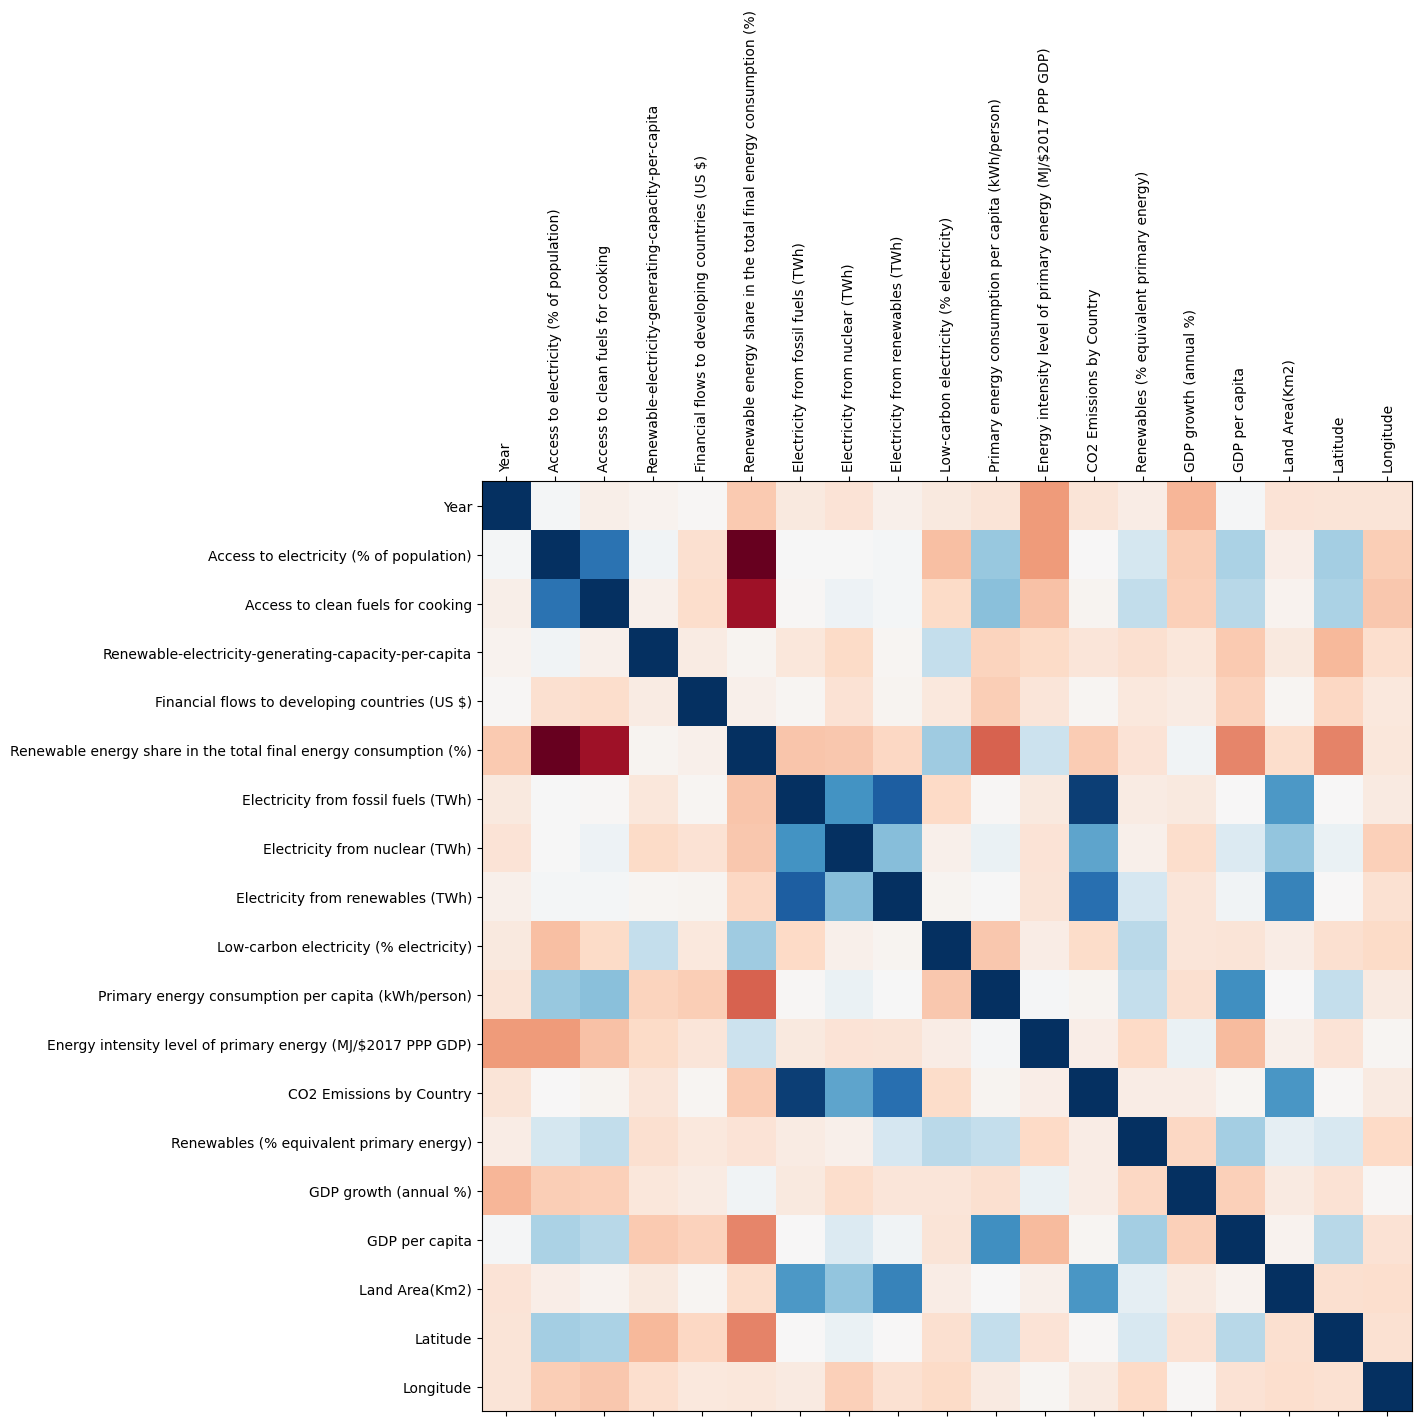

In [25]:
fig = plt.figure(figsize = (12,12))
plt.matshow(corr, cmap = 'RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

array([[<AxesSubplot:title={'center':'Electricity from fossil fuels (TWh)'}>,
        <AxesSubplot:title={'center':'Electricity from nuclear (TWh)'}>],
       [<AxesSubplot:title={'center':'Electricity from renewables (TWh)'}>,
        <AxesSubplot:title={'center':'Low-carbon electricity (% electricity)'}>]],
      dtype=object)

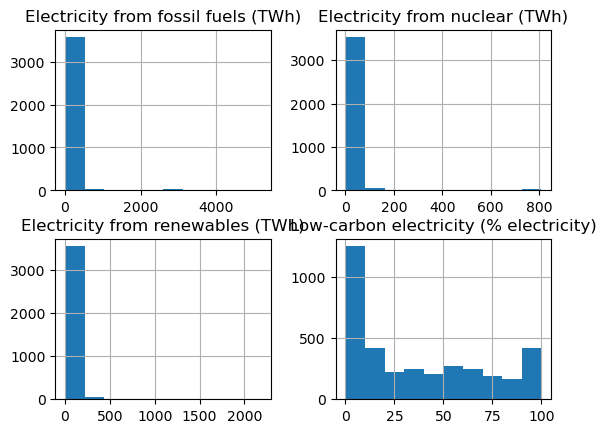

In [26]:
df.hist(column=["Electricity from fossil fuels (TWh)", "Electricity from nuclear (TWh)", "Electricity from renewables (TWh)", "Low-carbon electricity (% electricity)"])

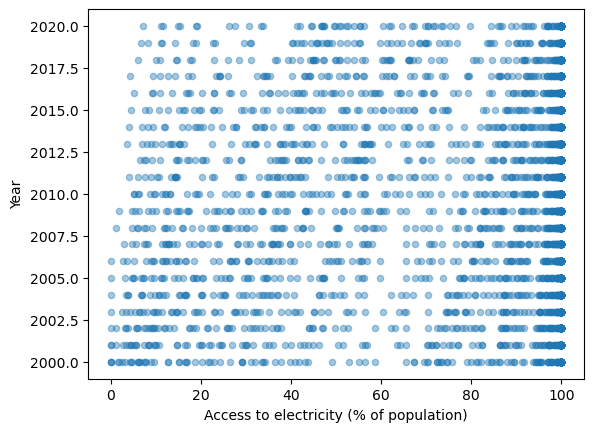

In [27]:
df.plot(kind="scatter", x="Access to electricity (% of population)", y="Year", alpha=0.4)
plt.show()

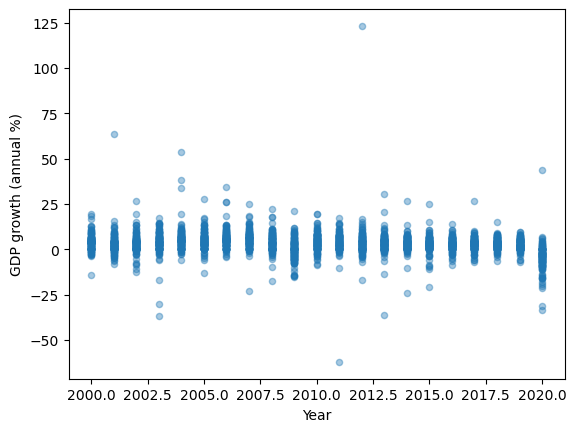

In [28]:
df.plot(kind="scatter", x="Year", y="GDP growth (annual %)", alpha=0.4)
plt.show()

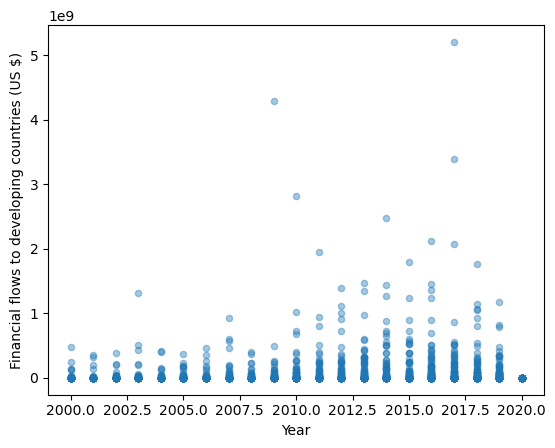

In [29]:
df.plot(kind="scatter", x="Year", y="Financial flows to developing countries (US $)", alpha=0.4)
plt.show()

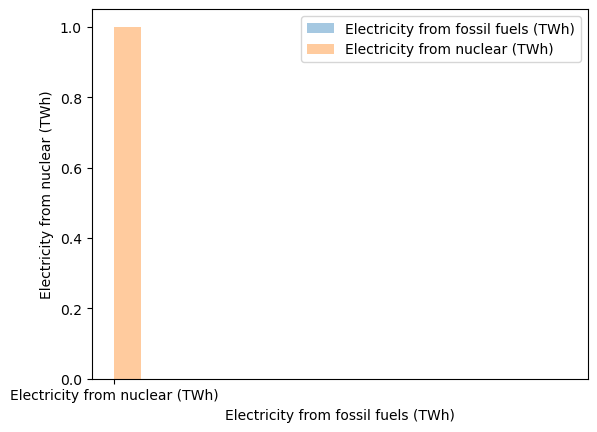

In [30]:
plt.xlabel('Electricity from fossil fuels (TWh)')
plt.ylabel('Electricity from nuclear (TWh)')
plt.hist("Electricity from fossil fuels (TWh)", alpha=0.4, bins=np.arange(1, 10, 0.5));
plt.hist("Electricity from nuclear (TWh)", alpha=0.4, bins=np.arange(1, 10, 0.5));
plt.legend(['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)']);

In [31]:
average_co2_emission_by_country = df.groupby('Entity')['CO2 Emissions by Country'].mean()

In [32]:
top_5_countries = average_co2_emission_by_country.nlargest(5)
top_5_countries

Entity
China            7.272993e+06
United States    5.075751e+06
India            1.556170e+06
Japan            1.127366e+06
Germany          7.368043e+05
Name: CO2 Emissions by Country, dtype: float64

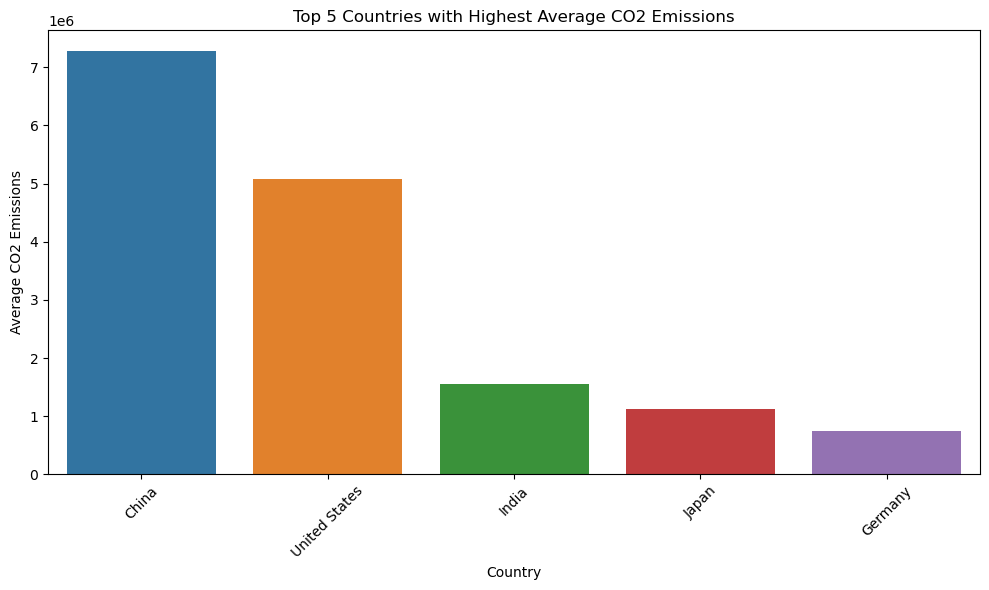

In [33]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_5_countries.index, y = top_5_countries.values)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions')
plt.title('Top 5 Countries with Highest Average CO2 Emissions')

plt.xticks(rotation = 45, ha = 'center')

plt.tight_layout()
plt.show()

In [34]:
average_ElecFromFossilFuel_by_country = df.groupby('Entity')['Electricity from fossil fuels (TWh)'].mean()

In [35]:
top_5_ElecFossilFuel_countries = average_ElecFromFossilFuel_by_country.nlargest(5)
top_5_ElecFossilFuel_countries

Entity
China            3234.634762
United States    2745.333333
India             830.753810
Japan             720.991429
Germany           363.829048
Name: Electricity from fossil fuels (TWh), dtype: float64

In [36]:
top_lowest_emissions = average_co2_emission_by_country.nsmallest(15)
top_lowest_emissions

Entity
Bahamas                              0.000000
Congo                                0.000000
Egypt                                0.000000
French Guiana                        0.000000
Gambia                               0.000000
Kyrgyzstan                           0.000000
Puerto Rico                          0.000000
Saint Kitts and Nevis                0.000000
Saint Lucia                          0.000000
Saint Vincent and the Grenadines     0.000000
Slovakia                             0.000000
Turkey                               0.000000
Yemen                                0.000000
Tuvalu                               9.523809
Nauru                               55.238095
Name: CO2 Emissions by Country, dtype: float64

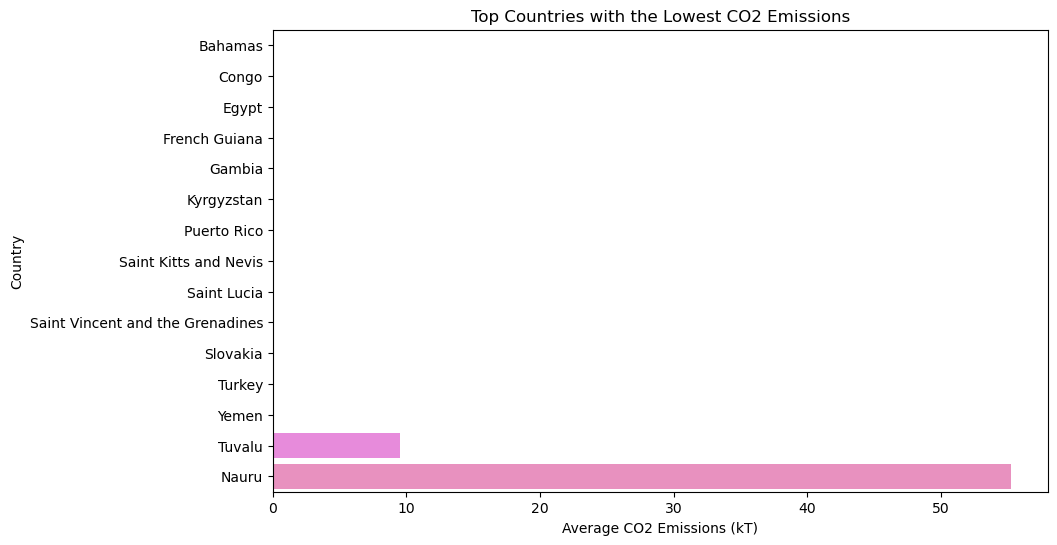

In [37]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_lowest_emissions.values, y = top_lowest_emissions.index)
plt.xlabel('Average CO2 Emissions (kT)')
plt.ylabel('Country')
plt.title('Top Countries with the Lowest CO2 Emissions')

plt.show()

In [38]:
average_co2_by_year = df.groupby('Year')['CO2 Emissions by Country'].mean()
average_co2_by_year = average_co2_by_year.reset_index()

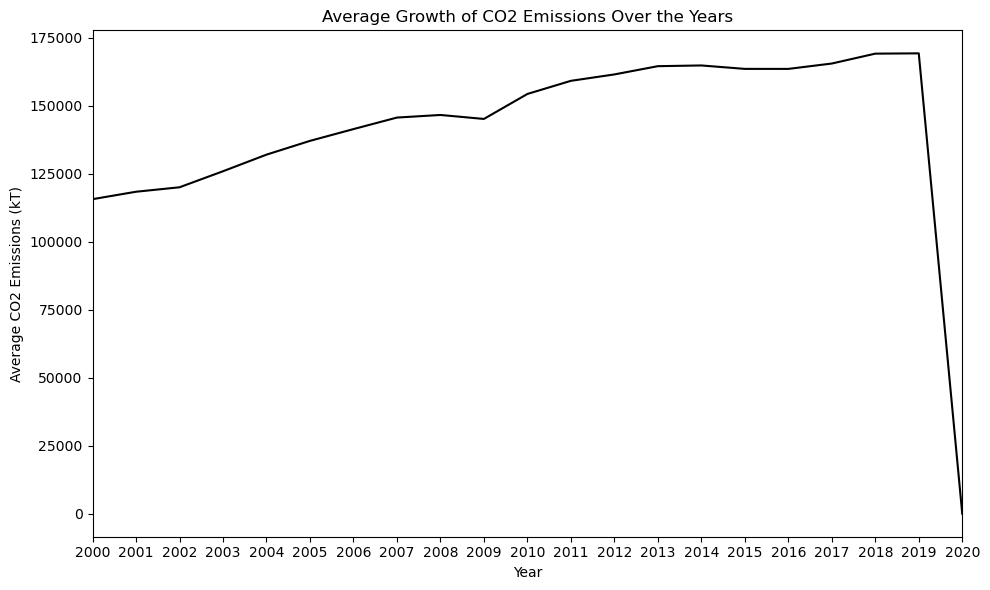

In [39]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = average_co2_by_year, x = 'Year', y = 'CO2 Emissions by Country', color = 'black')
plt.title('Average Growth of CO2 Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (kT)')

plt.xticks(average_co2_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2020)

plt.tight_layout()
plt.show()


##### Growth of CO2 emissions in countries with highest and lowest values compared to the average growth

In [40]:
china_data = df[df['Entity'] == 'China']
tuvalu_data = df[df['Entity'] == 'Tuvalu']

##### Highest Emission Country vs. World's Average

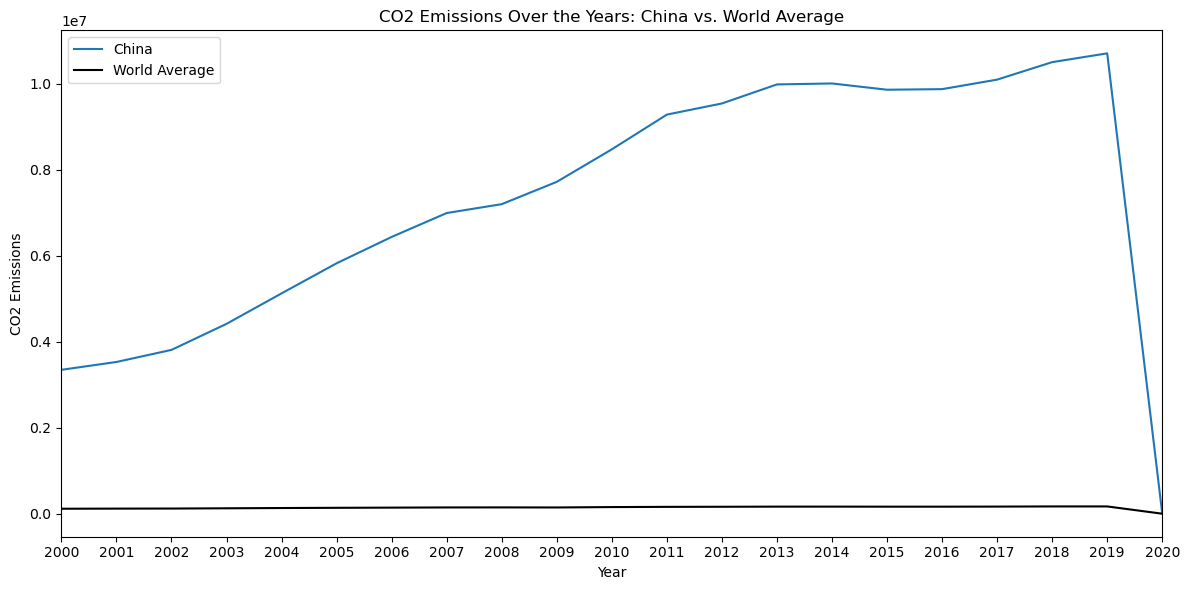

In [41]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = china_data, x = 'Year', y = 'CO2 Emissions by Country', label = 'China')
sns.lineplot(data = average_co2_by_year, x = 'Year', y = 'CO2 Emissions by Country', label = 'World Average', color = 'black')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Over the Years: China vs. World Average')

plt.xticks(average_co2_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2020)
    
plt.tight_layout()  
plt.show()

##### Lowest Emission Country vs. World's Average

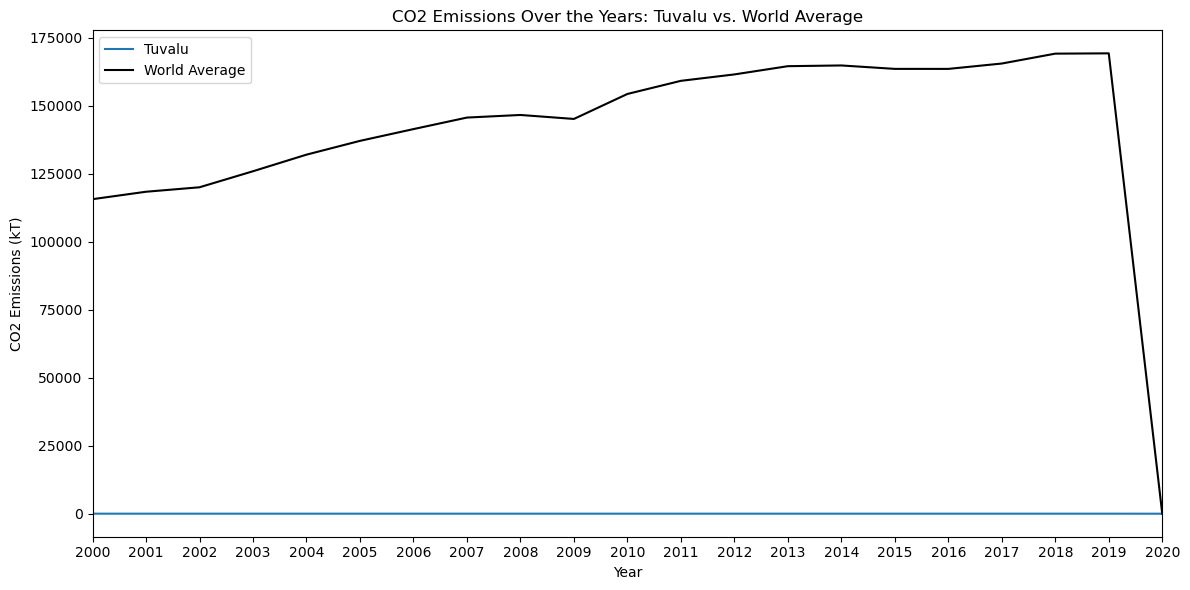

In [42]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = tuvalu_data, x = 'Year', y = 'CO2 Emissions by Country', label = 'Tuvalu')
sns.lineplot(data = average_co2_by_year, x = 'Year', y = 'CO2 Emissions by Country', label = 'World Average', color = 'black')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kT)')
plt.title('CO2 Emissions Over the Years: Tuvalu vs. World Average')

plt.xticks(average_co2_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2020)
    
plt.tight_layout()  
plt.show()